<a href="https://colab.research.google.com/github/DogMey/TelecomX_parte2_Latam/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamiento de datos

## Cargando y leyendo datos

In [8]:
import pandas as pd


df = pd.read_csv("datos_tratados.csv")
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


## Eliminamos columnas innecesarias para el desarrollo

In [10]:
df = df.drop(columns=["customerID"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


## Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning

In [12]:
# Aplicar One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df,
                            columns=["gender", "InternetService", "Contract", "PaymentMethod"],
                            drop_first=True)  # drop_first evita la multicolinealidad

In [13]:
df = df_encoded
df.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Charges.Total,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.796667,False,True,False,False,False,False,False,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   SeniorCitizen                          7267 non-null   int64  
 2   Partner                                7267 non-null   int64  
 3   Dependents                             7267 non-null   int64  
 4   tenure                                 7267 non-null   int64  
 5   PhoneService                           7267 non-null   int64  
 6   MultipleLines                          7267 non-null   int64  
 7   OnlineSecurity                         7267 non-null   int64  
 8   OnlineBackup                           7267 non-null   int64  
 9   DeviceProtection                       7267 non-null   int64  
 10  TechSupport                            7267 non-null   int64  
 11  Stre

## Verificación de la Proporción de Cancelación (Churn)

In [15]:
# Distribución de la variable Churn
churn_counts = df["Churn"].value_counts()

# Proporción en porcentaje
churn_percent = df["Churn"].value_counts(normalize=True) * 100

print("Conteo de clientes:")
print(churn_counts)

print("\nProporción de clientes (%):")
print(churn_percent)

Conteo de clientes:
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de clientes (%):
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


## Balanceo de Clases - SMOTE

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Variables predictoras (X) y target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Aplicamos SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Revisamos balanceo
print("Distribución original:", Counter(y))
print("Distribución balanceada:", Counter(y_res))

Distribución original: Counter({0: 5398, 1: 1869})
Distribución balanceada: Counter({0: 5398, 1: 5398})


## Normalización o Estandarización

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el dataset balanceado en train y test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Normalización con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos balanceados y normalizados listos para entrenar.")

Datos balanceados y normalizados listos para entrenar.


# Correlación y Selección de Variables

## Análisis de Correlación

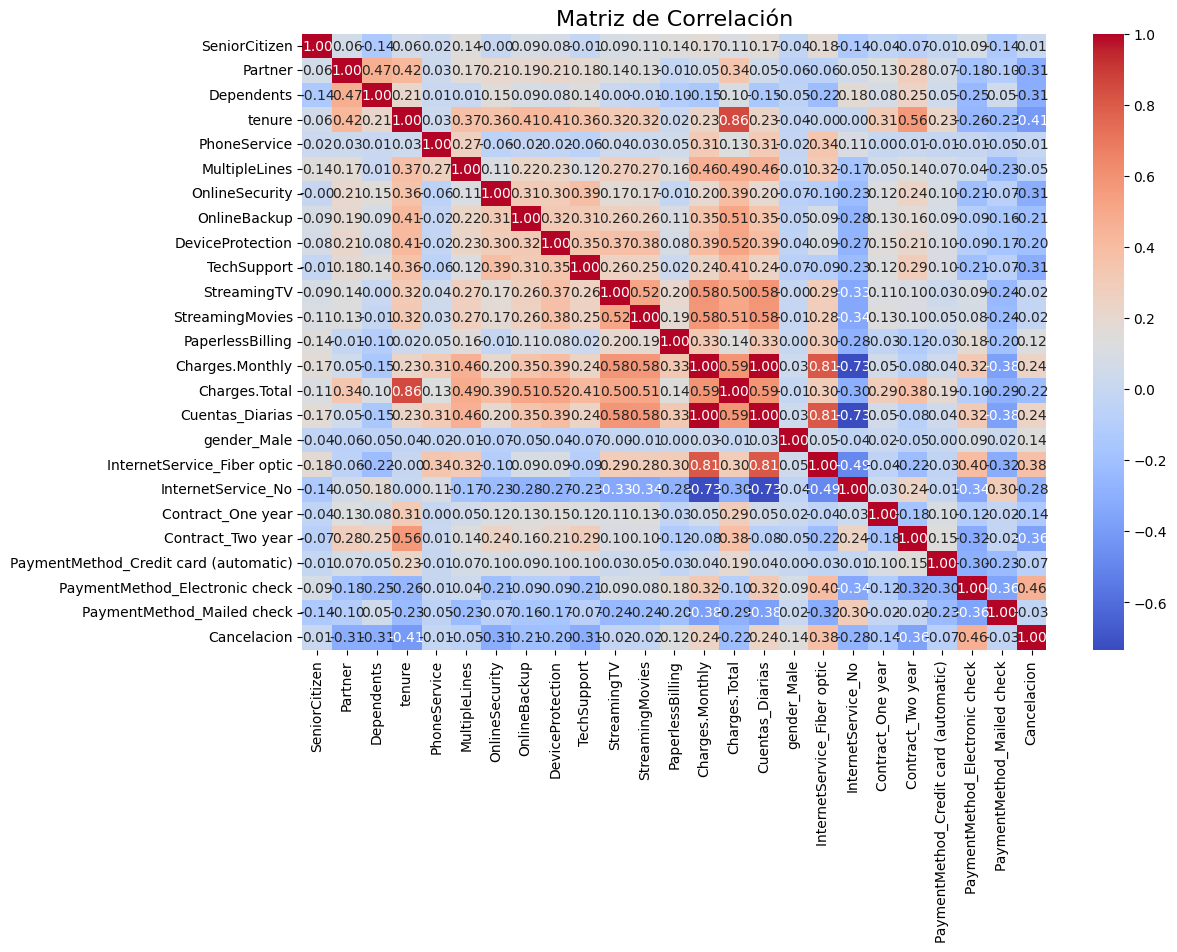


Correlaciones con Cancelacion (ordenadas):
Cancelacion                              1.000000
PaymentMethod_Electronic check           0.459657
InternetService_Fiber optic              0.375181
Charges.Monthly                          0.235433
Cuentas_Diarias                          0.235433
gender_Male                              0.140662
PaperlessBilling                         0.120161
SeniorCitizen                            0.012467
PhoneService                            -0.013078
StreamingMovies                         -0.020451
StreamingTV                             -0.020503
PaymentMethod_Mailed check              -0.033761
MultipleLines                           -0.051581
PaymentMethod_Credit card (automatic)   -0.072512
Contract_One year                       -0.143889
DeviceProtection                        -0.198319
OnlineBackup                            -0.206677
Charges.Total                           -0.224758
InternetService_No                      -0.278582
TechSu

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con X_res y y_res
df_corr = pd.DataFrame(X_res, columns=X.columns)  # X debe ser el DataFrame original de features
df_corr["Cancelacion"] = y_res.values

# Calcular correlación
corr_matrix = df_corr.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

# Mostrar las variables más correlacionadas con Cancelacion
print("\nCorrelaciones con Cancelacion (ordenadas):")
print(corr_matrix["Cancelacion"].sort_values(ascending=False))

## Análisis Dirigido

/tmp/ipython-input-328591498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelacion", y="tenure", data=df_corr, palette="Set2")


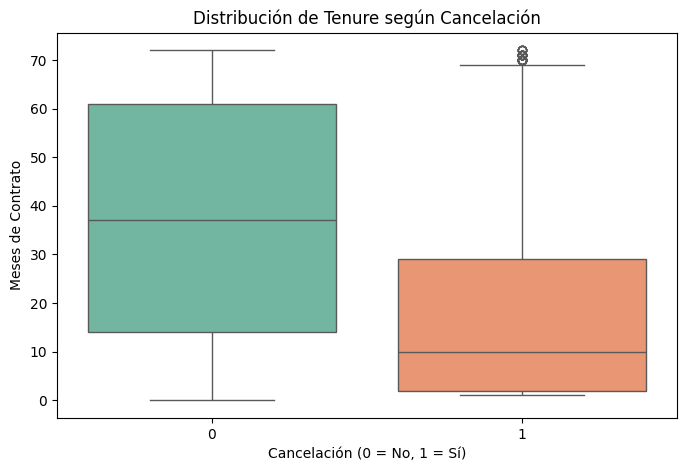

/tmp/ipython-input-328591498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelacion", y="Charges.Total", data=df_corr, palette="Set1")


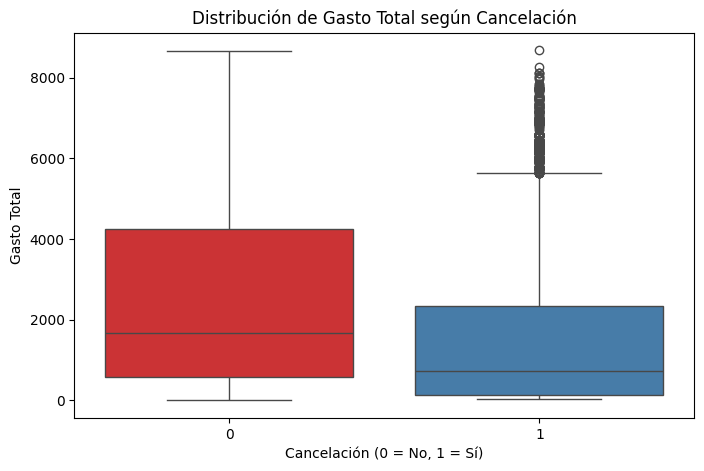

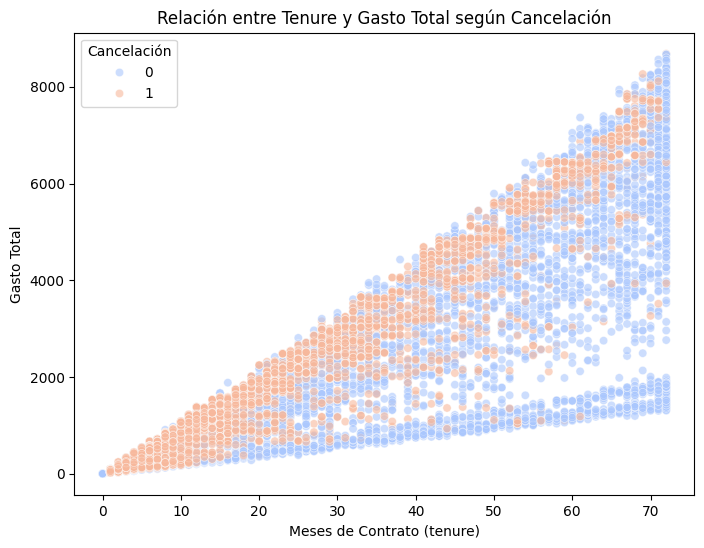

In [21]:
import seaborn as sns

# 1. Boxplot: tiempo de contrato vs cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancelacion", y="tenure", data=df_corr, palette="Set2")
plt.title("Distribución de Tenure según Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato")
plt.show()

# 2. Boxplot: gasto total vs cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancelacion", y="Charges.Total", data=df_corr, palette="Set1")
plt.title("Distribución de Gasto Total según Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total")
plt.show()

# 3. Scatter plot: tenure vs gasto total, coloreado por cancelación
plt.figure(figsize=(8,6))
sns.scatterplot(x="tenure", y="Charges.Total", hue="Cancelacion", data=df_corr, alpha=0.6, palette="coolwarm")
plt.title("Relación entre Tenure y Gasto Total según Cancelación")
plt.xlabel("Meses de Contrato (tenure)")
plt.ylabel("Gasto Total")
plt.legend(title="Cancelación")
plt.show()

Conclusión estratégica:

Tenure y TotalCharges son dos de las variables más importantes para predecir cancelación.

Existe un claro patrón: los clientes que se van lo hacen temprano (primer año), con bajo compromiso económico.

Estrategia de negocio: fidelización temprana (descuentos, promociones, soporte dedicado) podría reducir fuertemente la tasa de churn.

# Modelado Predictivo

## Separación de Datos

Este proceso lo hicimos en la normalizacion; tenemos que los datos son:
- El modelo se entrena con X_train_scaled y y_train.
- El modelo se evalúa con X_test_scaled y y_test.

In [ ]:
## Creacion de los modelos

### Regresión lógica

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ==========================
# Modelo 1: Regresión Logística (requiere normalización)
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Resultados Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Resultados Regresión Logística:
[[1334  286]
 [ 280 1339]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1620
           1       0.82      0.83      0.83      1619

    accuracy                           0.83      3239
   macro avg       0.83      0.83      0.83      3239
weighted avg       0.83      0.83      0.83      3239



### Árbol de decisión

In [27]:
# ==============================
# Modelo 2: Árbol de Decisión (no requiere normalización)
# ==============================
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Árbol de Decisión")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Árbol de Decisión
[[1243  377]
 [ 331 1288]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1620
           1       0.77      0.80      0.78      1619

    accuracy                           0.78      3239
   macro avg       0.78      0.78      0.78      3239
weighted avg       0.78      0.78      0.78      3239



De esta forma:

- Usamos normalización solo en la regresión logística.
- El árbol de decisión se entrena con los datos originales (X_train).

## Evaluación de los Modelos

### Evaluación de cada modelo

#### **Regresión Logística**

* **Matriz de confusión**

  ```
  [[1334  286]
   [ 280 1339]]
  ```

  * Verdaderos Negativos (VN): 1334
  * Falsos Positivos (FP): 286
  * Falsos Negativos (FN): 280
  * Verdaderos Positivos (VP): 1339

* **Métricas principales**

  * Exactitud: **0.83**
  * Precisión clase 1: **0.82**
  * Recall clase 1: **0.83**
  * F1-score clase 1: **0.83**

Podemos decir que es un modelo **equilibrado**, con un trade-off adecuado entre **precisión y recall**, lo cual indica buena capacidad de generalización.

---

#### **Árbol de Decisión**

* **Matriz de confusión**

  ```
  [[1243  377]
   [ 331 1288]]
  ```

  * VN: 1243
  * FP: 377
  * FN: 331
  * VP: 1288

* **Métricas principales**

  * Exactitud: **0.78**
  * Precisión clase 1: **0.77**
  * Recall clase 1: **0.80**
  * F1-score clase 1: **0.78**

El árbol de decisión tiene un rendimiento **menor que la regresión logística**. Tiende a cometer más **falsos positivos y falsos negativos**, mostrando cierta **inestabilidad** en la clasificación.

---

### Comparación crítica

* **Mejor desempeño global:**
  * **Regresión Logística** (83% de exactitud, métricas balanceadas).

* **Posible overfitting o underfitting:**

  * **Regresión Logística:** No muestra síntomas claros de overfitting ni underfitting. Métricas balanceadas, por lo que tiene una buena capacidad de generalizar.
  * **Árbol de Decisión:** Puede estar sufriendo de **overfitting leve**, ya que este tipo de modelos tienden a memorizar los datos de entrenamiento si no se regulan parámetros como `max_depth`, `min_samples_split`, etc. Aquí el desempeño en test es menor, lo que refuerza la idea.

---

### En conclusión:
El **mejor modelo en este experimento fue la Regresión Logística**, mostrando métricas más equilibradas y menor riesgo de overfitting. El **Árbol de Decisión necesita ajustes** para mejorar su generalización.


# Interpretación y conclusiones

## Analisis de la importancia de las variables


### Para regresión lógica

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Coeficientes de la regresión logística
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_reg.coef_[0]
})

# Ordenamos por importancia absoluta
coeficientes["Importancia"] = np.abs(coeficientes["Coeficiente"])
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)

print(coeficientes.head(10))

                          Variable  Coeficiente  Importancia
4                     PhoneService    -3.983015     3.983015
18              InternetService_No     2.982918     2.982918
17     InternetService_Fiber optic    -2.825279     2.825279
6                   OnlineSecurity    -1.658289     1.658289
9                      TechSupport    -1.612561     1.612561
11                 StreamingMovies    -1.595456     1.595456
10                     StreamingTV    -1.543885     1.543885
7                     OnlineBackup    -1.230373     1.230373
8                 DeviceProtection    -1.180557     1.180557
22  PaymentMethod_Electronic check     1.124668     1.124668


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Para árbol de decisión

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia de variables en Random Forest
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
})

importancias = importancias.sort_values(by="Importancia", ascending=False)

print(importancias.head(10))


                          Variable  Importancia
14                   Charges.Total     0.127935
3                           tenure     0.123581
13                 Charges.Monthly     0.115242
15                 Cuentas_Diarias     0.113501
22  PaymentMethod_Electronic check     0.085602
17     InternetService_Fiber optic     0.066921
6                   OnlineSecurity     0.040696
9                      TechSupport     0.039651
20               Contract_Two year     0.034779
1                          Partner     0.028484


# Conclusión

## **Regresión Logística**

La regresión logística nos da **coeficientes** que indican la dirección (positivo/negativo) y la magnitud de la relación entre la variable y la probabilidad de churn.

* **Variables más influyentes:**

  * **PhoneService** (-3.98): tener servicio telefónico reduce fuertemente la probabilidad de churn. Es decir, los clientes con línea telefónica son mucho más leales.
  * **InternetService\_No** (+2.98): no tener servicio de internet incrementa bastante la probabilidad de abandono (tiene sentido: clientes que solo contratan teléfono o televisión suelen buscar mejores ofertas en otros lados).
  * **InternetService\_Fiber optic** (-2.82): curiosamente, tener fibra óptica **disminuye** la probabilidad de churn en este modelo, lo cual puede deberse a que estos clientes suelen estar más satisfechos.
  * **OnlineSecurity (-1.65)** y **TechSupport (-1.61)**: los clientes con seguridad online y soporte técnico contratado tienden a ser más leales.
  * **StreamingMovies (-1.59)** y **StreamingTV (-1.54)**: contar con estos servicios reduce el churn, posiblemente porque incrementan la percepción de valor.
  * **PaymentMethod\_Electronic check** (+1.12): pagar con cheque electrónico aumenta el churn, lo que concuerda con estudios que muestran que este método suele asociarse a clientes menos estables.

**Conclusión de la regresión logística:**
El churn está muy asociado a **los servicios contratados** (teléfono, fibra óptica, seguridad online, soporte) y al **método de pago**. Los servicios adicionales y de valor agregado reducen la deserción.

---

## **Árbol de Decisión**

El árbol mide **importancia** como reducción de la impureza (qué variables mejor separan a los clientes).

* **Variables más importantes:**

  * **Charges.Total (0.128)**: el gasto total acumulado es la variable más relevante. Clientes que ya han invertido mucho suelen quedarse más.
  * **Tenure (0.124)**: el tiempo con la compañía es clave: clientes con más antigüedad tienen menor churn.
  * **Charges.Monthly (0.115)**: lo que pagan mensualmente influye mucho en la decisión de permanecer o irse.
  * **Cuentas\_Diarias (0.114)**: probablemente una variable derivada de uso, también importante.
  * **PaymentMethod\_Electronic check (0.086)**: refuerza el hallazgo de la regresión: este método de pago aumenta churn.
  * **InternetService\_Fiber optic (0.067)**: de nuevo relevante, aunque en este caso el modelo no distingue si reduce o aumenta, solo que separa bien clientes.
  * **OnlineSecurity (0.041)** y **TechSupport (0.040)**: otra vez aparecen como claves en la retención.
  * **Contract\_Two year (0.035)**: contratos largos claramente reducen el churn.

**Conclusión del árbol:**
El churn depende fuertemente de **variables financieras** (total pagado, mensualidad), la **antigüedad del cliente** y algunos servicios clave (fibra, soporte, seguridad).

---

## Comparación de modelos

* La **Regresión Logística** pone más peso en los **servicios contratados** y los **métodos de pago**.
* El **Árbol de Decisión** resalta más las **variables económicas** (cargos mensuales, totales, antigüedad).

En conjunto:

* **Servicios adicionales (seguridad, soporte, streaming)** ayudan a **retener clientes**.
* **Métodos de pago electrónicos tipo “cheque”** y **planes más caros sin servicios adicionales** aumentan la probabilidad de abandono.
* **La fidelidad (tenure)** y **el valor pagado acumulado** son fuertes predictores de permanencia.